In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import MultiCursor
import yfinance as yf

In [3]:
data=yf.download(tickers='TCS.NS', period='1y', interval='1d', start='2022-12-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-12-01  3425.000000  3480.000000  3420.000000  3475.649902  3348.503174   
2022-12-02  3458.100098  3468.899902  3413.000000  3439.149902  3313.338623   
2022-12-05  3433.000000  3439.149902  3407.000000  3425.899902  3300.573242   
2022-12-06  3400.050049  3407.949951  3368.000000  3385.350098  3261.507080   
2022-12-07  3368.300049  3393.699951  3354.000000  3380.600098  3256.930664   
...                 ...          ...          ...          ...          ...   
2023-12-22  3800.000000  3845.949951  3762.000000  3824.000000  3806.362549   
2023-12-26  3819.850098  3834.000000  3790.149902  3795.550049  3778.043701   
2023-12-27  3799.000000  3818.199951  3768.000000  3811.199951  3793.621338   
2023-12-28  3824.000000  3838.000000  3792.100098  3799.899902  3782.373535   
2023-12-29  3792.000000  3822.600098  3765.399902  3

In [5]:
dif = data['Adj Close'].diff(1)  # difference between two consecutive Adj Close
dif.dropna(inplace=True)  # Replace NAN values

In [6]:
positive = dif.copy()
positive[positive < 0] = 0  # Positive values only
negative = dif.copy()
negative[negative > 0] = 0  # Negative values only

In [7]:
days = 14

In [8]:
avg_profit = positive.rolling(days).mean()
avg_loss = abs(negative.rolling(days).mean())

In [9]:
relative_strength = avg_profit / avg_loss

In [10]:
RSI = 100.0 - (100.0 / (1.0 + relative_strength))
data['RSI'] = RSI
buy_signal = ((data["RSI"] < 30) & (data["RSI"].shift(1) > 30))
sell_signal = ((data["RSI"] > 70) & (data["RSI"].shift(1) < 70))
data["Buy_Signal"] = buy_signal
data["Sell_Signal"] = sell_signal

In [11]:
print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-12-01  3425.000000  3480.000000  3420.000000  3475.649902  3348.503174   
2022-12-02  3458.100098  3468.899902  3413.000000  3439.149902  3313.338623   
2022-12-05  3433.000000  3439.149902  3407.000000  3425.899902  3300.573242   
2022-12-06  3400.050049  3407.949951  3368.000000  3385.350098  3261.507080   
2022-12-07  3368.300049  3393.699951  3354.000000  3380.600098  3256.930664   
...                 ...          ...          ...          ...          ...   
2023-12-22  3800.000000  3845.949951  3762.000000  3824.000000  3806.362549   
2023-12-26  3819.850098  3834.000000  3790.149902  3795.550049  3778.043701   
2023-12-27  3799.000000  3818.199951  3768.000000  3811.199951  3793.621338   
2023-12-28  3824.000000  3838.000000  3792.100098  3799.899902  3782.373535   
2023-12-29  3792.000000  3822.600098  3765.399902  3

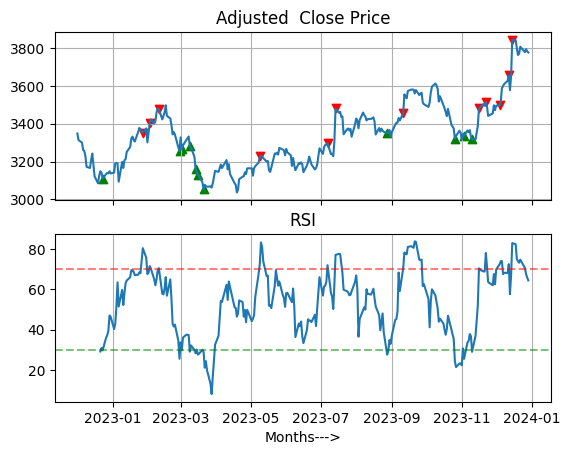

In [12]:
# Graph Plotting
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(data['Adj Close'])
ax1.grid()
ax1.scatter(data.index[data["Buy_Signal"]], data["Adj Close"][data["Buy_Signal"]], marker="^", color="green", label="Buy Signal")
ax1.scatter(data.index[data["Sell_Signal"]], data["Adj Close"][data["Sell_Signal"]], marker="v", color="red", label="Sell Signal")
ax1.set_title('Adjusted  Close Price')
ax2.plot(RSI)
ax2.grid(axis='x')
ax2.set_title('RSI')
ax2.axhline(30, linestyle='--', alpha=0.5, color='g')
ax2.axhline(70, linestyle='--', alpha=0.5, color='r')
multi = MultiCursor(None, (ax1, ax2), color='r')
plt.xlabel("Months--->")
plt.show()

In [13]:
action = None
actions = []

for i in range(len(data)):
    if buy_signal[i] and action != 'buy':
        action = 'buy'
    elif sell_signal[i] and action != 'sell':
        action = 'sell'
    actions.append(action)

data['Action'] = actions
print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-12-01  3425.000000  3480.000000  3420.000000  3475.649902  3348.503174   
2022-12-02  3458.100098  3468.899902  3413.000000  3439.149902  3313.338623   
2022-12-05  3433.000000  3439.149902  3407.000000  3425.899902  3300.573242   
2022-12-06  3400.050049  3407.949951  3368.000000  3385.350098  3261.507080   
2022-12-07  3368.300049  3393.699951  3354.000000  3380.600098  3256.930664   
...                 ...          ...          ...          ...          ...   
2023-12-22  3800.000000  3845.949951  3762.000000  3824.000000  3806.362549   
2023-12-26  3819.850098  3834.000000  3790.149902  3795.550049  3778.043701   
2023-12-27  3799.000000  3818.199951  3768.000000  3811.199951  3793.621338   
2023-12-28  3824.000000  3838.000000  3792.100098  3799.899902  3782.373535   
2023-12-29  3792.000000  3822.600098  3765.399902  3

In [14]:
weekly_df = data.resample('W').last()
weekly_df.dropna(subset=['Action'], inplace=True)
weekly_df.rename(columns={'Action': 'TCS'}, inplace=True)
weekly_df = weekly_df[['TCS']]
weekly_df = weekly_df[weekly_df.index >= '2023-01-01']
print(weekly_df)


             TCS
Date            
2023-01-01   buy
2023-01-08   buy
2023-01-15   buy
2023-01-22   buy
2023-01-29  sell
2023-02-05  sell
2023-02-12  sell
2023-02-19  sell
2023-02-26  sell
2023-03-05   buy
2023-03-12   buy
2023-03-19   buy
2023-03-26   buy
2023-04-02   buy
2023-04-09   buy
2023-04-16   buy
2023-04-23   buy
2023-04-30   buy
2023-05-07   buy
2023-05-14  sell
2023-05-21  sell
2023-05-28  sell
2023-06-04  sell
2023-06-11  sell
2023-06-18  sell
2023-06-25  sell
2023-07-02  sell
2023-07-09  sell
2023-07-16  sell
2023-07-23  sell
2023-07-30  sell
2023-08-06  sell
2023-08-13  sell
2023-08-20  sell
2023-08-27  sell
2023-09-03   buy
2023-09-10   buy
2023-09-17  sell
2023-09-24  sell
2023-10-01  sell
2023-10-08  sell
2023-10-15  sell
2023-10-22  sell
2023-10-29   buy
2023-11-05   buy
2023-11-12   buy
2023-11-19  sell
2023-11-26  sell
2023-12-03  sell
2023-12-10  sell
2023-12-17  sell
2023-12-24  sell
2023-12-31  sell
